In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory (where the notebook is running)
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [3]:
from scripts.headline_text_analyzer import HeadlineAnalyzer
analyzer = HeadlineAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Load news headline dataset
headline_df = pd.read_csv('Data\\raw_analyst_ratings\\raw_analyst_ratings.csv')

## Dscriptive Statistics

**Setting up the date and time to Newyork's time(UTC-4)**

In [5]:
headline_df['date_only'] = headline_df['date'].apply(lambda x: x.split()[0])
headline_df['time_only'] = headline_df['date'].apply(lambda x: x.split()[1].split('+')[0].split('-')[0])

In [6]:

headline_df['date_only']=pd.to_datetime(headline_df['date_only'])
headline_df['time_only']=pd.to_datetime(headline_df['time_only']).dt.time

C:\Users\HP\AppData\Local\Temp\ipykernel_9212\483385364.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  headline_df['time_only']=pd.to_datetime(headline_df['time_only']).dt.time


In [7]:
# Headline Length Analysis
headline_df['headline_length'] = headline_df['headline'].str.len()

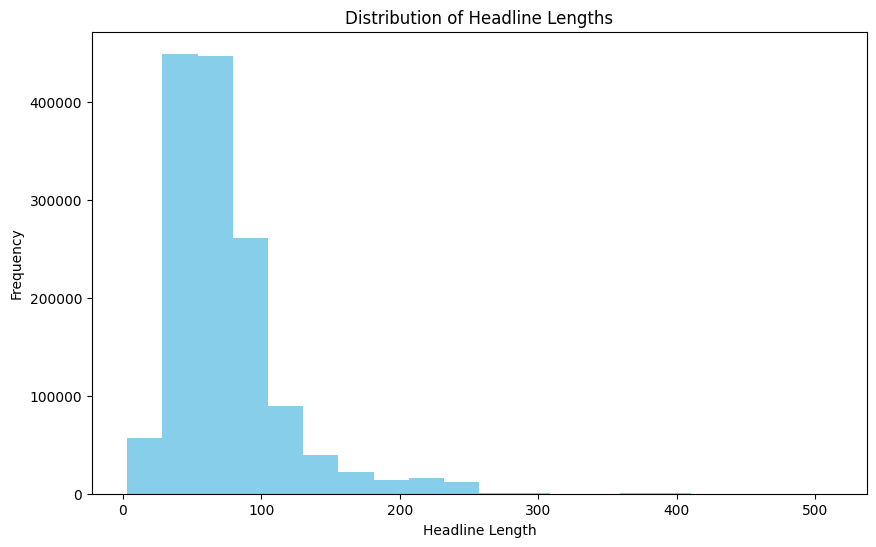

In [8]:
# Plotting the distribution of headline lengths
plt.figure(figsize=(10, 6))
plt.hist(headline_df['headline_length'], bins=20, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

**Count the number of articles per publisher to identify which publishers are most active.**

In [9]:
# Publisher Activity Analysis
publisher_counts = headline_df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


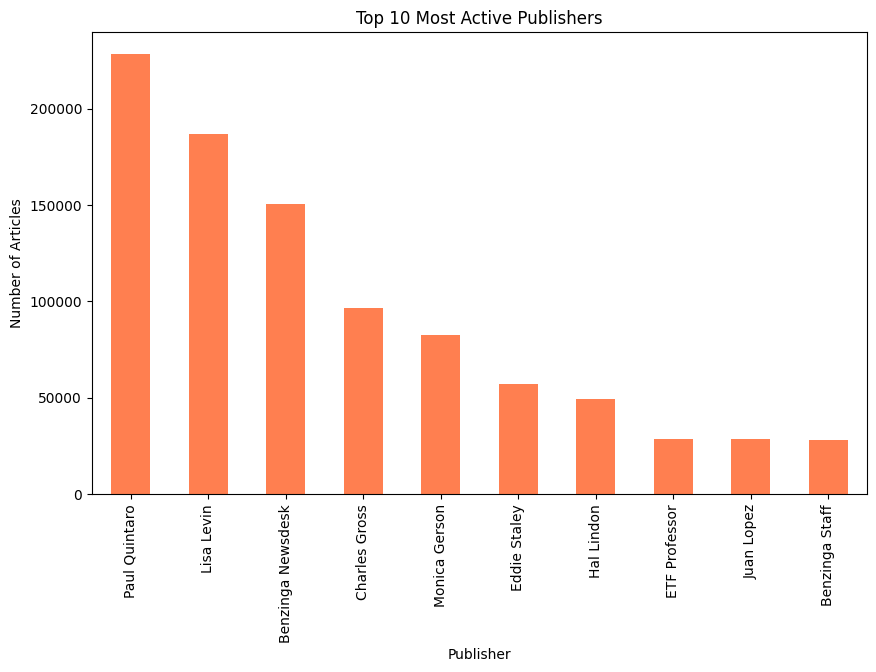

In [10]:
# Plotting the most active publishers
plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

**Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.**

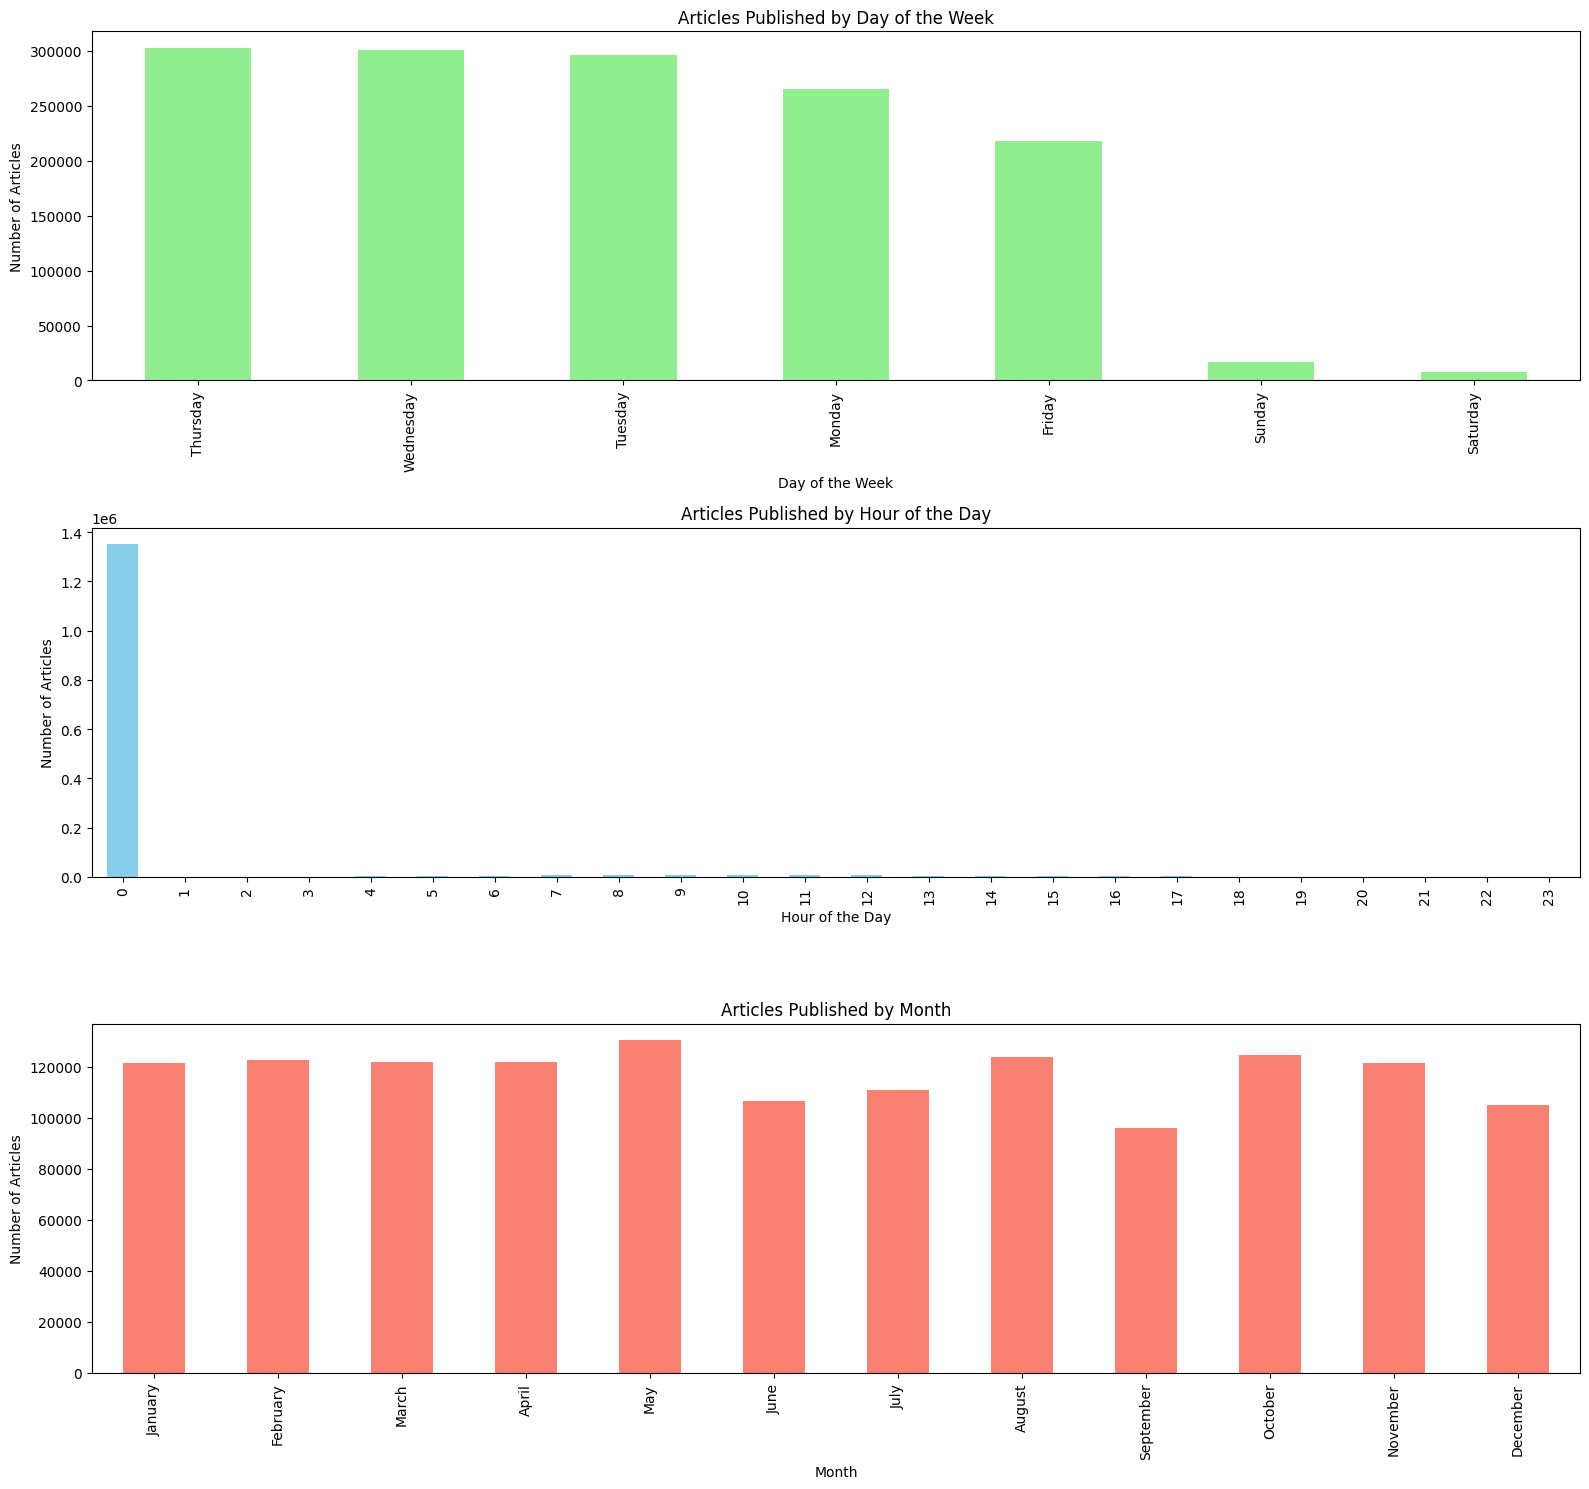

In [11]:
analyzer.publication_freq_plot(headline_df)

## Text Analysis(Sentiment analysis & Topic Modeling):

### Sentiment Analysis

sentiment
Neutral          825174
Positive         350496
Negative         151648
Very Positive     58949
Very Negative     21061
Name: count, dtype: int64


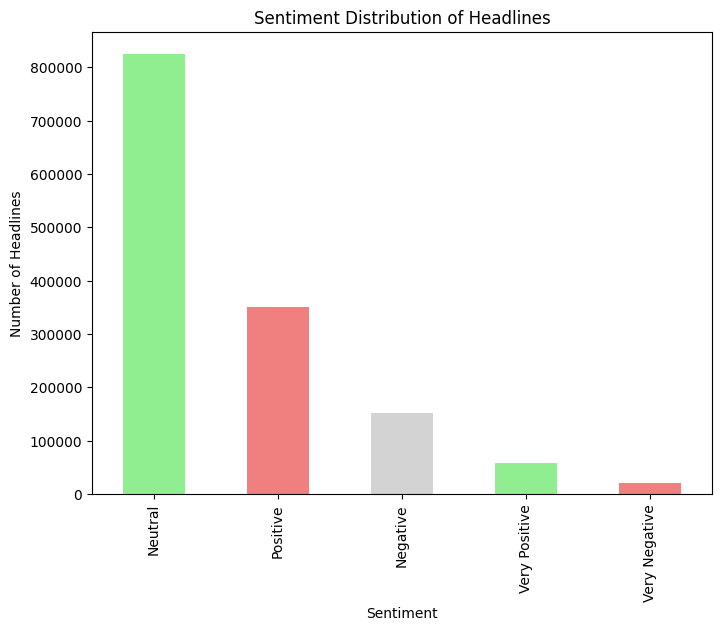

In [12]:
#calculating sentiment for each headline, catagorizing and plotting frequency distibution
analyzer.sentiment_analysis(headline_df) 

## Time Series Analysis

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Count headlines per day
daily_headlines = headline_df.groupby('date_only').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'Date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('Date', inplace=True)

In [14]:
time_series_data

,Headlines_Count
Date,
2009-02-14,1
2009-04-27,2
2009-04-29,1
2009-05-22,1
2009-05-27,6
...,...
2020-06-07,25
2020-06-08,765
2020-06-09,804


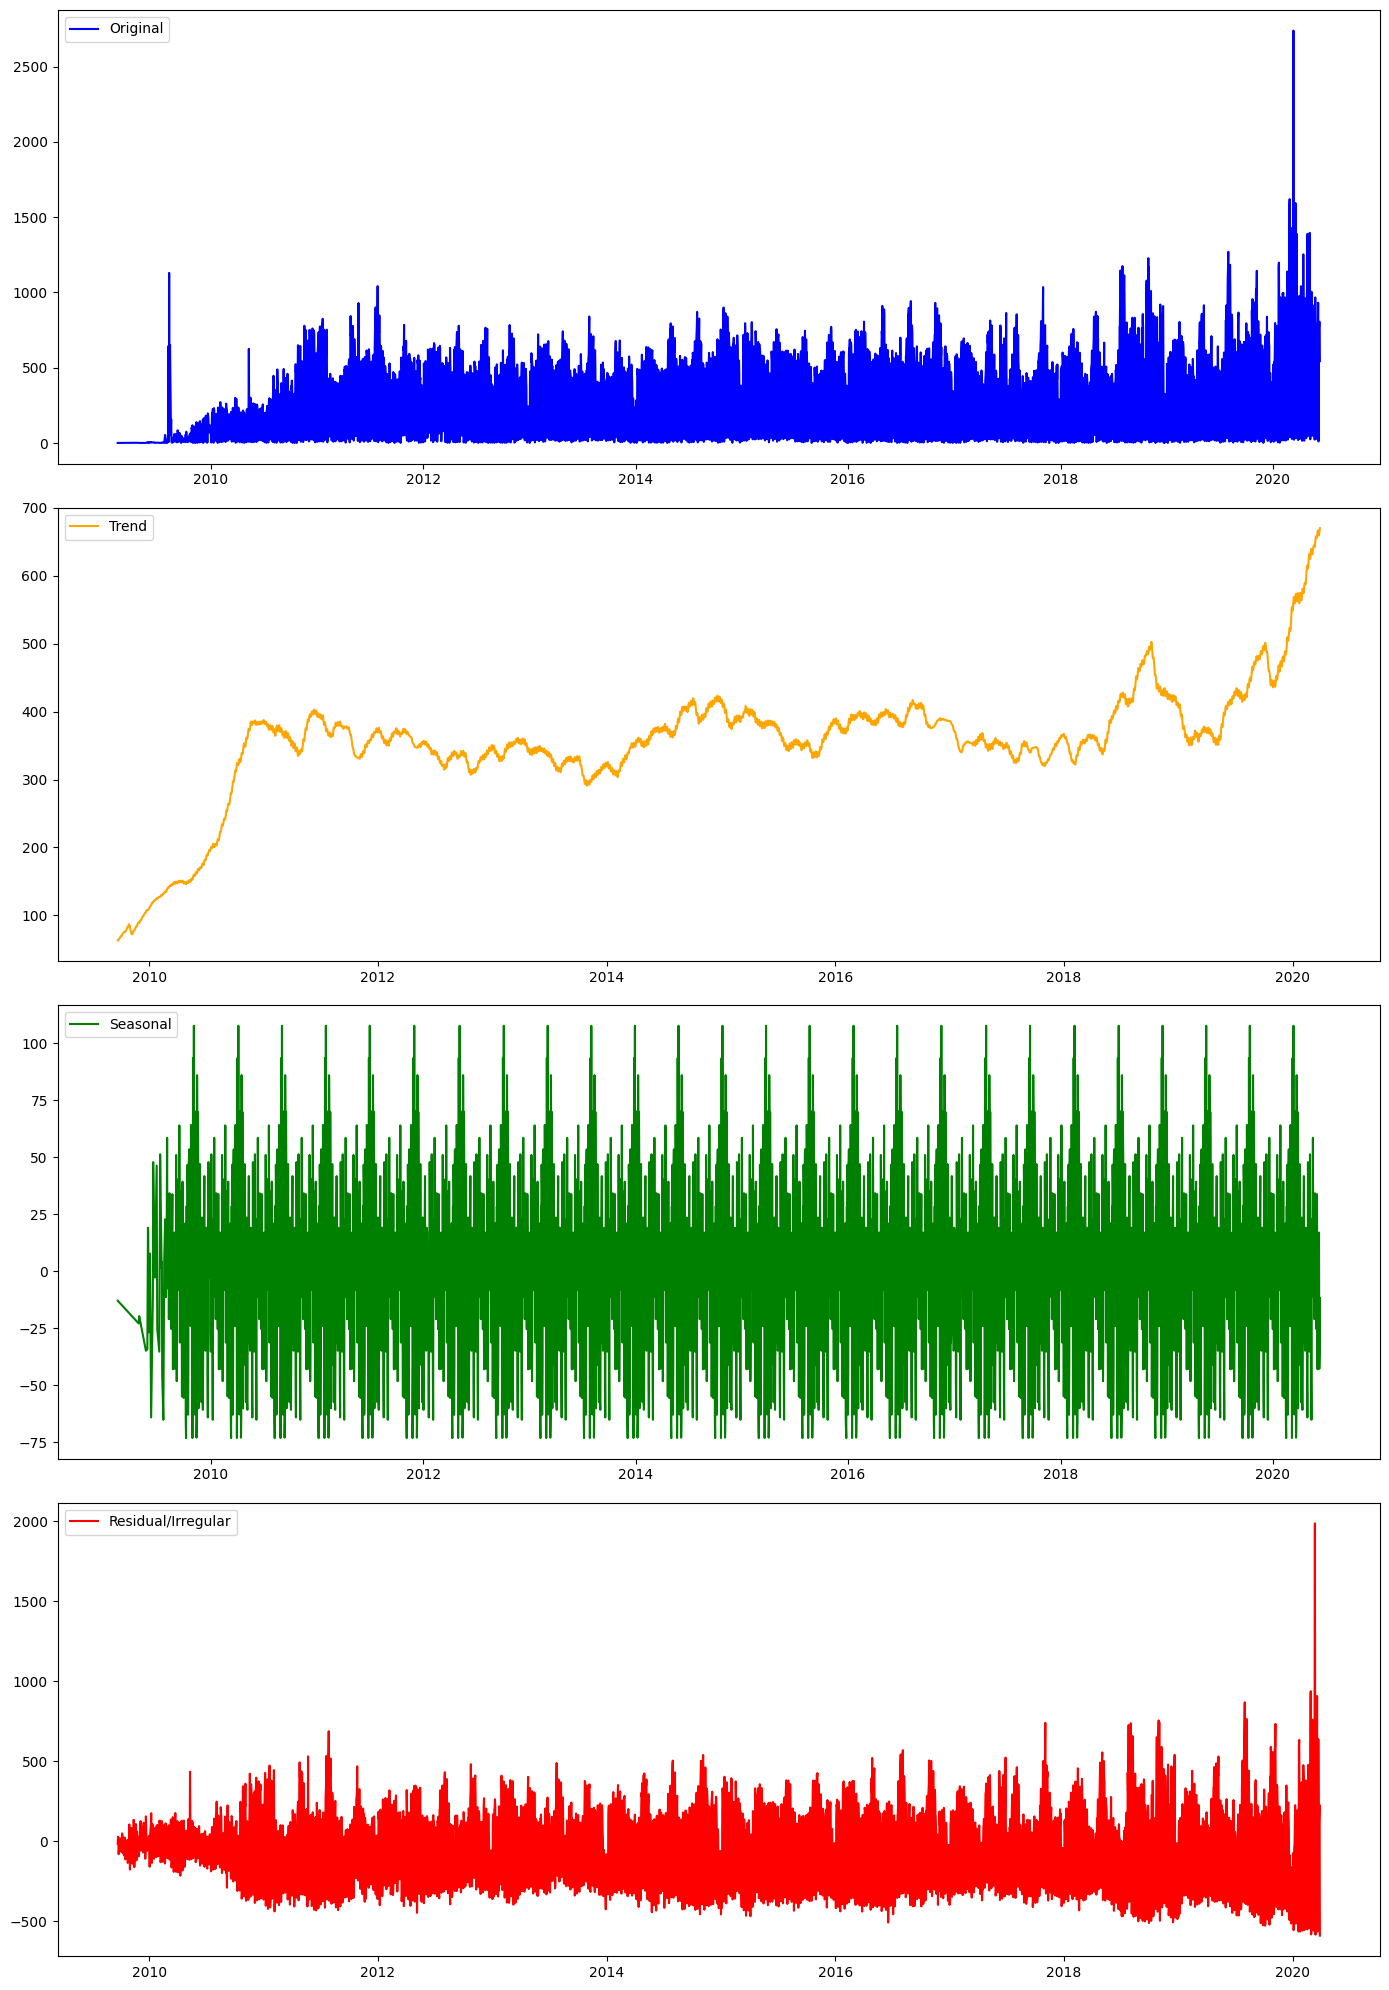

In [15]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=150)

# Plotting the components
plt.figure(figsize=(14, 20))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

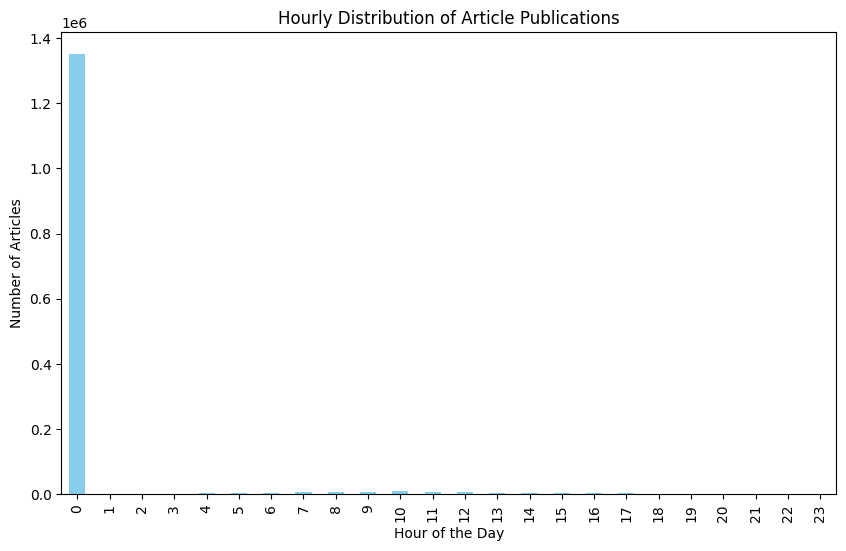

In [16]:
# Extract the hour from the datetime column
# headline_df['hour'] = headline_df['date'].dt.hour
headline_df['hour'] = headline_df['time_only'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Count the number of articles published in each hour
hourly_distribution = headline_df['hour'].value_counts().sort_index()

# Plot the hourly distribution of article publications
plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='bar', color='skyblue')
plt.title('Hourly Distribution of Article Publications')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()


In [19]:
#saving the sentiment score in separate data
headline_df.to_csv('Data/sentiment_data.csv', index=False)
